In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Bayesian-style metric updates

Suppose we have a trained and validated classifier that we are running in a live environment.

The number of instances requiring classification 

Our classifier makes a number of predictions per day (on previously unseen data).

At the end of each day the actual groundtruth labels become available.

We keep track of the predicted versus actual labels per day.


In [80]:
n_days = 10
n_instances = np.random.randint(low=40, high=80, size=10)
balance_low, balance_high = .3, .5
Recall_assumed = .8
Precision_assumed = .6
n_predicted_correctly = np.array([int(x) for x in (balance_low + (balance_high - balance_low)*np.random.rand(n_days,))*n_instances])
Ls = pd.DataFrame(index=pd.date_range(start='2019-01-01', freq='D', periods=n_days), \
                  data=np.vstack((n_instances, n_predicted_correctly)).T, \
                  columns=['instances', 'actual_positives'])
Ls['actual_negatives'] = Ls['instances'] - Ls['actual_positives']
Ls['true_positives'] = (Recall_assumed * Ls['actual_positives']).astype(int)
Ls['false_negatives'] = Ls['actual_positives'] - Ls['true_positives']
Ls['false_positives'] = (Ls['true_positives'] * (1/Precision_assumed - 1)).astype(int)
Ls['true_negatives'] = Ls['actual_negatives'] - Ls['false_positives']

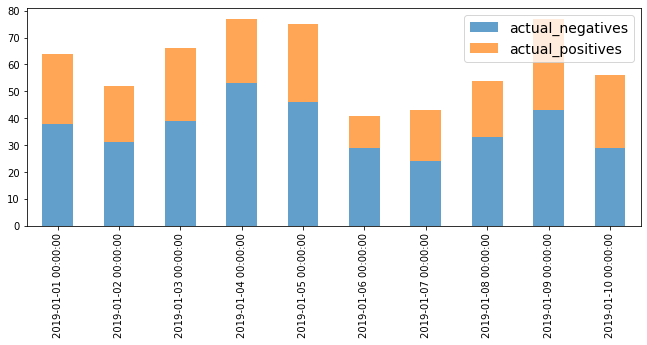

In [82]:
Ls[['actual_negatives','actual_positives']].plot.bar(width=.5, figsize=(11,4), stacked=True, alpha=.7)
plt.legend(fontsize=14)

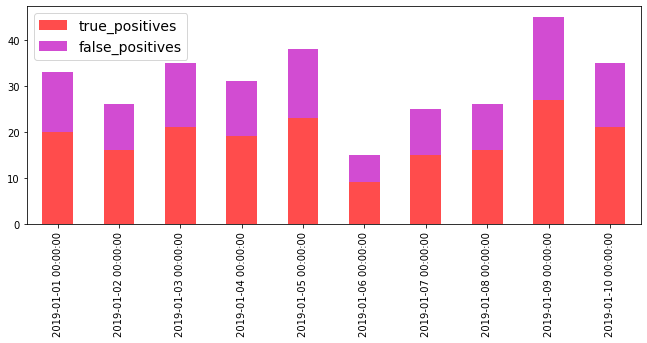

In [83]:
Ls[['true_positives','false_positives']].plot.bar(width=.5, figsize=(11,4), color=['r','m'], stacked=True, alpha=.7)
plt.legend(fontsize=14)

In [84]:
Ls

,instances,actual_positives,actual_negatives,true_positives,false_negatives,false_positives,true_negatives
2019-01-01,64,26,38,20,6,13,25
2019-01-02,52,21,31,16,5,10,21
2019-01-03,66,27,39,21,6,14,25
2019-01-04,77,24,53,19,5,12,41
2019-01-05,75,29,46,23,6,15,31
2019-01-06,41,12,29,9,3,6,23
2019-01-07,43,19,24,15,4,10,14
2019-01-08,54,21,33,16,5,10,23
2019-01-09,77,34,43,27,7,18,25
2019-01-10,56,27,29,21,6,14,15


### Compute daily precisions and Beta-Binomial estimate of precision

In [85]:
Ls['day_precision'] = Ls['true_positives'] / (Ls['true_positives'] + Ls['false_positives'])

In [86]:
Ls

,instances,actual_positives,actual_negatives,true_positives,false_negatives,false_positives,true_negatives,day_precision
2019-01-01,64,26,38,20,6,13,25,0.606061
2019-01-02,52,21,31,16,5,10,21,0.615385
2019-01-03,66,27,39,21,6,14,25,0.600000
2019-01-04,77,24,53,19,5,12,41,0.612903
2019-01-05,75,29,46,23,6,15,31,0.605263
2019-01-06,41,12,29,9,3,6,23,0.600000
2019-01-07,43,19,24,15,4,10,14,0.600000
2019-01-08,54,21,33,16,5,10,23,0.615385
2019-01-09,77,34,43,27,7,18,25,0.600000
2019-01-10,56,27,29,21,6,14,15,0.600000
